# __<center>TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN</center>__

## __<center>Trực quan hóa dữ liệu</center>__

---

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import math

In [2]:
cover_id_df = pd.read_csv('./Source/1_cover_id_main.csv')
individual_id_df = pd.read_csv('./Source/3_individual_id_main.csv', encoding = 'utf-8', encoding_errors = 'ignore')
diary_main_df = pd.read_csv('./Source/4_diary_main.csv', encoding = 'utf-8', encoding_errors = 'ignore')

## Cover ID - This file contains the basic information of the interview and the household asset part.

In [3]:
cover_id_df.head()

,ID,pid,MATINH,Urban_Rural,age,C1,C2,TOTAL_HH_member,assets_1,assets_2,...,assets_12,assets_13,assets_14,assets_15,assets_16,assets_17,assets_18,assets_19,C9,C10
0,10010000600801,1,1,1,28,1,1,2,0,1,...,1,1,1,1,1,0,0,0,1,NaN
1,10010000600803,2,1,1,48,1,2,3,0,1,...,1,1,1,0,1,1,1,0,1,NaN
2,10010000600814,1,1,1,29,1,1,2,0,1,...,1,1,1,0,1,1,1,0,1,NaN
3,10010000600823,1,1,1,40,1,1,1,0,1,...,1,1,1,0,1,1,1,0,1,NaN
4,10010000600824,4,1,1,52,1,4,5,0,1,...,1,1,1,0,1,1,1,0,1,NaN


### Số dòng và cột của dữ liệu.

In [4]:
shape = cover_id_df.shape
print(f"Cases: {shape[0]}")
print(f"Variables: {shape[1]}")

Cases: 6001
Variables: 29


### Dữ liệu bị trùng và bị thiếu.

In [5]:
print(f"Number of duplicated rows: {cover_id_df.duplicated().sum()}" )
cover_id_df.isna().sum()

Number of duplicated rows: 0


ID                    0
pid                   0
MATINH                0
Urban_Rural           0
age                   0
C1                    0
C2                    0
TOTAL_HH_member       0
assets_1              0
assets_2              0
assets_3              0
assets_4              0
assets_5              0
assets_6              0
assets_7              0
assets_8              0
assets_9              0
assets_10             0
assets_11             0
assets_12             0
assets_13             0
assets_14             0
assets_15             0
assets_16             0
assets_17             0
assets_18             0
assets_19             0
C9                    0
C10                5654
dtype: int64

> Chỉ có cột `C10` là có rất nhiều dữ liệu bị thiếu. Các cột đều có kiểu dữ liệu `int64`.

### Nhận xét chung.

- Tự các nhận xét ở trên. Cột `C10` bị thiếu gần như toàn bộ nên ta sẽ tiến hành loại bỏ cột này.
- Cũng theo đó, như ý nghĩa của các cột dữ liệu khảo sát. Cột `C9` có liên quan đến `C10` và cũng không quá liên quan đến dữ liệu. Ta tiến hành loại bỏ cột này.

In [6]:
cover_id_df.drop(['pid','C9', 'C10'], axis=1, inplace=True)
cover_id_df.describe()

,ID,MATINH,Urban_Rural,age,C1,C2,TOTAL_HH_member,assets_1,assets_2,assets_3,...,assets_10,assets_11,assets_12,assets_13,assets_14,assets_15,assets_16,assets_17,assets_18,assets_19
count,6.001000e+03,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,...,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000
mean,5.232553e+14,51.800033,1.617564,40.096317,1.305949,2.340777,3.427762,0.044493,0.958507,0.605399,...,0.103649,0.942676,0.440927,0.713881,0.967505,0.193968,0.984336,0.246959,0.414431,0.008832
std,2.849148e+14,28.227758,0.486023,13.308558,1.304114,0.976568,1.411201,0.206204,0.199444,0.488806,...,0.304831,0.232480,0.496539,0.451983,0.177324,0.395437,0.124182,0.431279,0.492665,0.093570
min,1.001000e+13,1.000000,1.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.131312e+14,31.000000,1.000000,30.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.849720e+14,48.000000,2.000000,39.000000,1.000000,2.000000,3.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.775427e+14,77.000000,2.000000,51.000000,1.000000,3.000000,4.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,9.596132e+14,95.000000,2.000000,64.000000,10.000000,7.000000,11.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cover_id_df.rename( columns={
    'C1': 'Ethnicity', 'C2': 'Num of 15-64y.o HH members', 'assets_1': 'Automobile', 'assets_2' : 'Motorbike', 'assets_3' : 'Bike',
    'assets_4': 'Ship/boats', 'assets_5' : 'Pumping machine', 'assets_6': 'Electricity generators', 'assets_7': 'Moblie phone',
    'assets_8': 'Sewing machine', 'assets_9': 'TV', 'assets_10' : 'Computer/Laptop', 'assets_11' : 'Refrigerator', 'assets_12': 'Air conditioner',
    'assets_13':  'Washing machine', 'assets_14' : 'Gas stove', 'assets_15': 'Electric cooker', 'assets_16': 'Rice cooker', 'assets_17': 'Baking/oven',
    'assets_18': 'Extractor/Citrus juicer', 'assets_19':'Piano/Keyboard'}, inplace= True
)

In [8]:
cover_id_df.head()

,ID,MATINH,Urban_Rural,age,Ethnicity,Num of 15-64y.o HH members,TOTAL_HH_member,Automobile,Motorbike,Bike,...,Computer/Laptop,Refrigerator,Air conditioner,Washing machine,Gas stove,Electric cooker,Rice cooker,Baking/oven,Extractor/Citrus juicer,Piano/Keyboard
0,10010000600801,1,1,28,1,1,2,0,1,0,...,0,1,1,1,1,1,1,0,0,0
1,10010000600803,1,1,48,1,2,3,0,1,0,...,1,1,1,1,1,0,1,1,1,0
2,10010000600814,1,1,29,1,1,2,0,1,0,...,0,1,1,1,1,0,1,1,1,0
3,10010000600823,1,1,40,1,1,1,0,1,0,...,0,1,1,1,1,0,1,1,1,0
4,10010000600824,1,1,52,1,4,5,0,1,1,...,0,1,1,1,1,0,1,1,1,0


In [9]:
data = {
    'MATINH': [1, 10, 14, 15, 17, 19, 20, 22, 24, 25, 31, 33, 35, 36, 38,40, 42, 44, 46, 48, 52, 56, 64, 66, 67, 68, 70, 72, 74, 75, 77, 79, 80, 82, 87, 89, 91, 92, 93, 95],
    'TenMaTinh': ['Thành phố Hà Nội',
                  'Tỉnh Lào Cai',
                  'Tỉnh Sơn La',
                  'Tỉnh Yên Bái',
                  'Tỉnh Hoà Bình',
                  'Tỉnh Thái Nguyên',
                  'Tỉnh Lạng Sơn',
                  'Tỉnh Quảng Ninh',
                  'Tỉnh Bắc Giang',
                  'Tỉnh Phú Thọ',
                  'Thành phố Hải Phòng',
                  'Tỉnh Hưng Yên',
                  'Tỉnh Hà Nam',
                  'Tỉnh Nam Định',
                  'Tỉnh Thanh Hoá',
                  'Tỉnh Nghệ An',
                  'Tỉnh Hà Tĩnh',
                  'Tỉnh Quảng Bình',	
                  'Tỉnh Thừa Thiên Huế',	
                  'Thành phố Đà Nẵng',
                  'Tỉnh Bình Định',	
                  'Tỉnh Khánh Hòa',
                  'Tỉnh Gia Lai',
                  'Tỉnh Đắk Lắk',
                  'Tỉnh Đắk Nông',
                  'Tỉnh Lâm Đồng',
                  'Tỉnh Bình Phước',
                  'Tỉnh Tây Ninh',
                  'Tỉnh Bình Dương',
                  'Tỉnh Đồng Nai',
                  'Tỉnh Bà Rịa - Vũng Tàu',
                  'Thành Phố Hồ Chí Minh',
                  'Tỉnh Long An',	
                  'Tỉnh Tiền Giang',	
                  'Tỉnh Đồng Tháp',
                  'Tỉnh An Giang',
                  'Tỉnh Kiên Giang',
                  'Thành phố Cần Thơ',
                  'Tỉnh Hậu Giang',
                  'Tỉnh Bạc Liêu']
}
print(len(data['TenMaTinh']))
MaTinhdf = pd.DataFrame(data)
MaTinhdf.head()

40


,MATINH,TenMaTinh
0,1,Thành phố Hà Nội
1,10,Tỉnh Lào Cai
2,14,Tỉnh Sơn La
3,15,Tỉnh Yên Bái
4,17,Tỉnh Hoà Bình


In [10]:
data = {
    'Ethnicity': [0,1,2,3,4,5,6,7,8,9,10],
    'Value': [
        'Gia rai',
        'Kinh',
        'Tay',
        'Thai',	
        'Muong',	
        'Kho me',	
        'Hoa',	
        'Nung',	
        'HMong',	
        'Dao',	
        'Others'
    ]
}
Ethnicitydf = pd.DataFrame(data)
Ethnicitydf.head()

,Ethnicity,Value
0,0,Gia rai
1,1,Kinh
2,2,Tay
3,3,Thai
4,4,Muong


In [11]:
data = {
    'index': [0,1],
    'value': ['No','Yes']
}
YesNodf = pd.DataFrame(data)
YesNodf

,index,value
0,0,No
1,1,Yes


In [12]:
data = {
    'index': [1,2],
    'value': ['Urban','Rural']
}
Urbanitydf = pd.DataFrame(data)
Urbanitydf

,index,value
0,1,Urban
1,2,Rural


In [13]:
cover_id_df['MATINH'] = cover_id_df['MATINH'].map(MaTinhdf.set_index('MATINH')['TenMaTinh'])
cover_id_df['Urban_Rural'] = cover_id_df['Urban_Rural'].map(Urbanitydf.set_index('index')['value'])
cover_id_df['Ethnicity'] = cover_id_df['Ethnicity'].map(Ethnicitydf.set_index('Ethnicity')['Value'])
cover_id_df['Automobile'] = cover_id_df['Automobile'].map(YesNodf.set_index('index')['value'])
cover_id_df['Bike'] = cover_id_df['Bike'].map(YesNodf.set_index('index')['value'])
cover_id_df['Ship/boats'] = cover_id_df['Ship/boats'].map(YesNodf.set_index('index')['value'])
cover_id_df['Pumping machine'] = cover_id_df['Pumping machine'].map(YesNodf.set_index('index')['value'])
cover_id_df['Electricity generators'] = cover_id_df['Electricity generators'].map(YesNodf.set_index('index')['value'])
cover_id_df['Moblie phone'] = cover_id_df['Moblie phone'].map(YesNodf.set_index('index')['value'])
cover_id_df['Sewing machine'] = cover_id_df['Sewing machine'].map(YesNodf.set_index('index')['value'])
cover_id_df['TV'] = cover_id_df['TV'].map(YesNodf.set_index('index')['value'])
cover_id_df['Computer/Laptop'] = cover_id_df['Computer/Laptop'].map(YesNodf.set_index('index')['value'])
cover_id_df['Refrigerator'] = cover_id_df['Refrigerator'].map(YesNodf.set_index('index')['value'])
cover_id_df['Air conditioner'] = cover_id_df['Air conditioner'].map(YesNodf.set_index('index')['value'])
cover_id_df['Washing machine'] = cover_id_df['Washing machine'].map(YesNodf.set_index('index')['value'])
cover_id_df['Gas stove'] = cover_id_df['Gas stove'].map(YesNodf.set_index('index')['value'])
cover_id_df['Electric cooker'] = cover_id_df['Electric cooker'].map(YesNodf.set_index('index')['value'])
cover_id_df['Rice cooker'] = cover_id_df['Rice cooker'].map(YesNodf.set_index('index')['value'])
cover_id_df['Baking/oven'] = cover_id_df['Baking/oven'].map(YesNodf.set_index('index')['value'])
cover_id_df['Extractor/Citrus juicer'] = cover_id_df['Extractor/Citrus juicer'].map(YesNodf.set_index('index')['value'])
cover_id_df['Piano/Keyboard'] = cover_id_df['Piano/Keyboard'].map(YesNodf.set_index('index')['value'])

cover_id_df.rename( columns ={
    'MATINH': 'Tên mã tỉnh'
    }, inplace = True
)

cover_id_df

,ID,Tên mã tỉnh,Urban_Rural,age,Ethnicity,Num of 15-64y.o HH members,TOTAL_HH_member,Automobile,Motorbike,Bike,...,Computer/Laptop,Refrigerator,Air conditioner,Washing machine,Gas stove,Electric cooker,Rice cooker,Baking/oven,Extractor/Citrus juicer,Piano/Keyboard
0,10010000600801,Thành phố Hà Nội,Urban,28,Kinh,1,2,No,1,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
1,10010000600803,Thành phố Hà Nội,Urban,48,Kinh,2,3,No,1,No,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
2,10010000600814,Thành phố Hà Nội,Urban,29,Kinh,1,2,No,1,No,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,10010000600823,Thành phố Hà Nội,Urban,40,Kinh,1,1,No,1,No,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
4,10010000600824,Thành phố Hà Nội,Urban,52,Kinh,4,5,No,1,Yes,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,959613192702034,Tỉnh Bạc Liêu,Rural,47,Kinh,2,2,No,1,Yes,...,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No
5997,959613192702036,Tỉnh Bạc Liêu,Rural,33,Kinh,1,4,No,1,Yes,...,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No
5998,959613192702038,Tỉnh Bạc Liêu,Rural,41,Kinh,3,3,No,1,Yes,...,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No
5999,959613192702039,Tỉnh Bạc Liêu,Rural,54,Kinh,2,2,No,1,Yes,...,No,Yes,No,No,Yes,No,Yes,No,No,No


In [14]:
cover_id_df.to_excel('./Processed/cover_id_main_processed.xlsx')

---

## Individual ID

In [15]:
individual_id_df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,Q302,Q303A,Q303B,Q304_1,...,Q310B1,Q310B2,Q311,Q305A,Q305B,Q310AA,Q310B,region3,agegroup,weight
0,464741975000808,4,46,1,37,1,12,4,4,1,...,NaN,NaN,NaN,th___ c__ kh,NaN,NaN,NaN,Central,15-44,1669648
1,565682237802338,4,56,1,32,1,12,3,2,1,...,NaN,NaN,NaN,nhn vin cty c___p thot n_____c,NaN,NaN,NaN,Central,15-44,1669648
2,484922025401426,5,48,1,43,1,9,2,0,1,...,NaN,NaN,NaN,ch___y shopee,NaN,NaN,NaN,Central,15-44,1669648
3,383931534600537,4,38,1,42,1,12,3,0,1,...,NaN,NaN,NaN,cng nhn,NaN,NaN,NaN,Central,15-44,1669648
4,464802002000820,4,46,1,38,1,6,1,0,1,...,NaN,NaN,NaN,th___ xy d___ng,NaN,NaN,NaN,Central,15-44,1669648


In [16]:
print(f"Có {len(individual_id_df['Q305A'].unique())} câu trả lời xuất hiện trong Q305A gồm: {individual_id_df['Q305A'].unique()}" )

Có 2012 câu trả lời xuất hiện trong Q305A gồm: ['th___ c__ kh' 'nhn vin cty c___p thot n_____c' 'ch___y shopee' ...
 'bu___n bn qun an' 'dan lt' 'BUN BN CHU___I']


Dữ liệu của Q305A bị lỗi và khá khó nhận biết. Các cột dữ liệu khác có thể phần nào giúp trả lời dữ liệu trong cột này nên ta có thể loại bỏ.

In [17]:
num_nan_in_columns = individual_id_df.isna().sum()
cols_has_nan = num_nan_in_columns[num_nan_in_columns!=0].to_frame().T

for col in cols_has_nan.columns:
    cols_has_nan[col] = cols_has_nan[col].apply(lambda x: np.array([x, len(individual_id_df) - x]))
cols_has_nan

,Q304_2,Q304_3,Q304_4,Q305A1,Q305A2,Q305B1,Q305B2,Q306,Q307,Q308,Q309,Q310A1,Q310A2,Q310B1,Q310B2,Q311,Q305A,Q305B,Q310AA,Q310B
0,"[5872, 129]","[6000, 1]","[6001, 0]","[1506, 4495]","[1506, 4495]","[1506, 4495]","[1507, 4494]","[1506, 4495]","[1506, 4495]","[1747, 4254]","[1747, 4254]","[5461, 540]","[5461, 540]","[5461, 540]","[5461, 540]","[5461, 540]","[1506, 4495]","[6001, 0]","[5461, 540]","[6001, 0]"


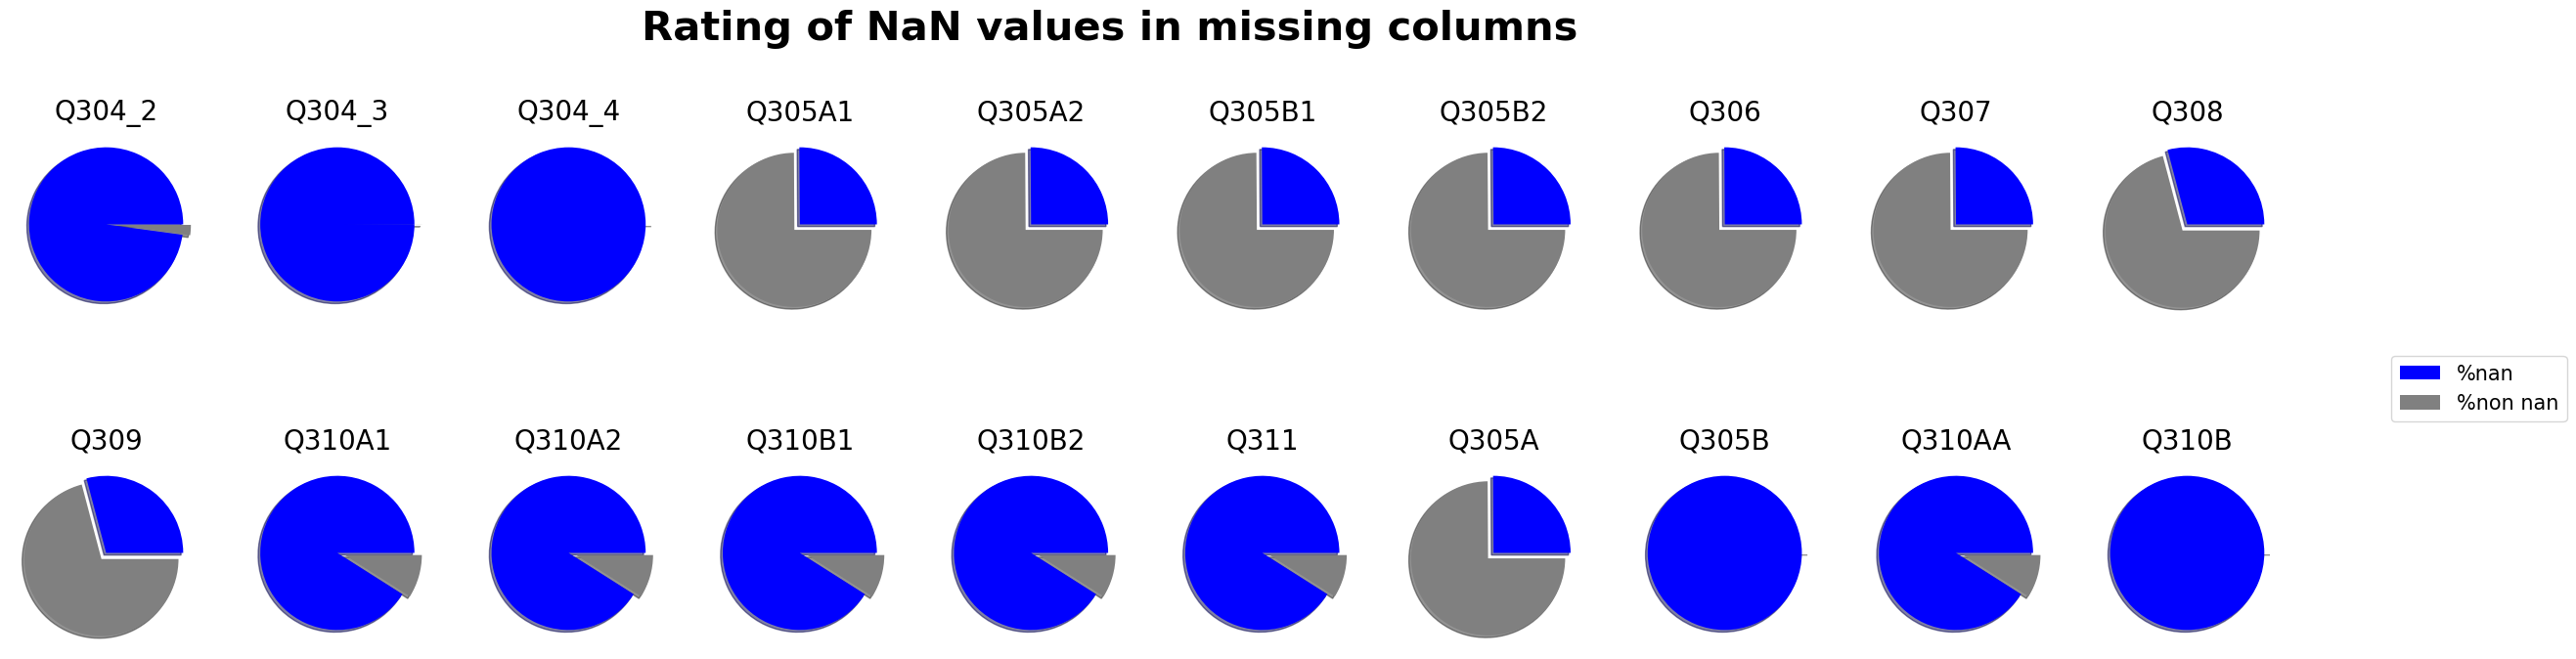

In [18]:
fig, ax = plt.subplots(2, 10, figsize = (30, 8))

explode = [0,0.1]
labels = ['%nan', '%non nan']
line = 0
for ind, col in enumerate(cols_has_nan.columns): 
    ax[math.floor(ind/10)][ind % 10].pie(cols_has_nan[col][0], colors = ["blue", "grey"], explode = explode, shadow = True)
    ax[math.floor(ind/10)][ind % 10].set_title(f"{col}", fontsize = 20)

fig.suptitle("Rating of NaN values in missing columns", fontsize = 30, fontweight = "bold")
fig.legend(labels = labels,  bbox_to_anchor = (1,0.55), fontsize = 15)
plt.show()

Ta rất khó phân tích các cột dữ liệu bị thiếu hơn 1 nửa nên sẽ tiến hành loại bỏ các cột này. Các cột còn lại có thể tiến hành xem xét loại bỏ tùy vào ý nghĩa của nó với phân tích.

In [19]:
High_nan = num_nan_in_columns[num_nan_in_columns/len(individual_id_df) >= 0.5].to_frame().T
individual_id_df.drop(High_nan.columns, axis = 1, inplace=True)
individual_id_df.drop(['pid','age','Q305A', 'weight'], axis=1, inplace= True)

In [20]:
individual_id_df.describe()

,ID,MATINH,Urban_Rural,gender,Q302,Q303A,Q303B,Q304_1,Q305A1,Q305A2,Q305B1,Q305B2,Q306,Q307,Q308,Q309
count,6.001000e+03,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,4495.000000,4495.000000,4495.000000,4494.000000,4495.000000,4495.000000,4254.00000,4254.000000
mean,5.232553e+14,51.800033,1.617564,1.658890,9.024163,2.216297,0.234128,1.456591,7.849388,75.767075,8.091880,41.976190,3.371301,1.053615,12936.49859,1.742125
std,2.849148e+14,28.227758,0.486023,0.474122,3.179400,1.240245,0.791207,1.120189,25.657483,30.578589,16.368483,35.403227,1.454341,0.225282,81958.98996,0.437516
min,1.001000e+13,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
25%,3.131312e+14,31.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000,6.000000,61.000000,1.000000,1.000000,2.000000,1.000000,3000.00000,1.000000
50%,4.849720e+14,48.000000,2.000000,2.000000,9.000000,2.000000,0.000000,1.000000,7.000000,75.000000,6.000000,42.000000,4.000000,1.000000,5500.00000,2.000000
75%,7.775427e+14,77.000000,2.000000,2.000000,12.000000,3.000000,0.000000,3.000000,9.000000,93.000000,13.000000,68.000000,4.000000,1.000000,8000.00000,2.000000
max,9.596132e+14,95.000000,2.000000,2.000000,12.000000,6.000000,4.000000,3.000000,998.000000,998.000000,998.000000,99.000000,6.000000,2.000000,999999.00000,2.000000


Theo như mô tả trên ta có thể thấy số lượng dòng không bị thiếu (count) của các cột có dữ liệu bị thiếu còn lại có số lượng gần tương đương nhau.
Ta có thể xem xét xem các dữ liệu này có bị thiếu trên cùng 1 dòng không và có thể loại bỏ nó.

In [21]:
Nan_row = individual_id_df.isna().sum(axis=1)
Drop_row = Nan_row[Nan_row >= 5].index
print(f"Có {len(Drop_row)} dòng bị thiếu nhiều hơn 5 thuộc tính.")

Có 1506 dòng bị thiếu nhiều hơn 5 thuộc tính.


Loại bỏ các trường bị thiếu nhiều dữ liệu.

In [22]:
individual_id_df.drop(Drop_row, inplace=True)
individual_id_df.describe()

,ID,MATINH,Urban_Rural,gender,Q302,Q303A,Q303B,Q304_1,Q305A1,Q305A2,Q305B1,Q305B2,Q306,Q307,Q308,Q309
count,4.495000e+03,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4494.000000,4495.000000,4495.000000,4254.00000,4254.000000
mean,5.012471e+14,49.619800,1.629588,1.621135,9.108120,2.270968,0.265184,1.944605,7.849388,75.767075,8.091880,41.976190,3.371301,1.053615,12936.49859,1.742125
std,2.797698e+14,27.719706,0.482969,0.485159,3.149002,1.275907,0.843032,0.852130,25.657483,30.578589,16.368483,35.403227,1.454341,0.225282,81958.98996,0.437516
min,1.001000e+13,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
25%,3.130811e+14,31.000000,1.000000,1.000000,7.000000,1.000000,0.000000,1.000000,6.000000,61.000000,1.000000,1.000000,2.000000,1.000000,3000.00000,1.000000
50%,4.647420e+14,46.000000,2.000000,2.000000,9.000000,2.000000,0.000000,2.000000,7.000000,75.000000,6.000000,42.000000,4.000000,1.000000,5500.00000,2.000000
75%,7.573526e+14,75.000000,2.000000,2.000000,12.000000,3.000000,0.000000,3.000000,9.000000,93.000000,13.000000,68.000000,4.000000,1.000000,8000.00000,2.000000
max,9.596132e+14,95.000000,2.000000,2.000000,12.000000,6.000000,4.000000,3.000000,998.000000,998.000000,998.000000,99.000000,6.000000,2.000000,999999.00000,2.000000


In [23]:
data = {
    'index': [1, 2],
    'value': ['male', 'female']
}
genderdf = pd.DataFrame(data)
genderdf

,index,value
0,1,male
1,2,female


In [24]:
data = {
    'index': [0,1,2,3,4,5,6,7,8,9,98,998],
    'value': [
        'Armed Forces',
        'Leaders In All Sectors And',
        'High-Level Experts',
        'Mid-Level Experts',
        'Office Workers',
        'Service And Sales Staff',	
        'Skilled Workers In Agriculture, Forestry, And Fishery',	
        'Manual Workers And Related Occupations',	
        'Machine Assembling And Operating Workers',
        'Low-Skilled Labourers',
        'Other (specify)',
        'Art industry / Freelance',
    ]
}

jobdf = pd.DataFrame(data)
jobdf

,index,value
0,0,Armed Forces
1,1,Leaders In All Sectors And
2,2,High-Level Experts
3,3,Mid-Level Experts
4,4,Office Workers
5,5,Service And Sales Staff
6,6,"Skilled Workers In Agriculture, Forestry, And ..."
7,7,Manual Workers And Related Occupations
8,8,Machine Assembling And Operating Workers
9,9,Low-Skilled Labourers


In [25]:
data = {
    'index': [
        1 ,
        2 ,
        3 ,
        10 ,
        11 ,
        12 ,
        13 ,
        14 ,
        15 ,
        16 ,
        17 ,
        21 ,
        22 ,
        23 ,
        24 ,
        25 ,
        26 ,
        31 ,
        32 ,
        33 ,
        34 ,
        35 ,
        36 ,
        41 ,
        42 ,
        43 ,
        44 ,
        51 ,
        52 ,
        53 ,
        54 ,
        61 ,
        62 ,
        63 ,
        71 ,
        72 ,
        73 ,
        74 ,
        75 ,
        81 ,
        82 ,
        83 ,
        91 ,
        92 ,
        93 ,
        94 ,
        95 ,
        96 ,
        98,
        998
    ],
    'value': [
        'Officers',	
        'Non-officers',	
        'Other members of armed forces',	
        'Leaders of Communist Party offices at central level and local level (full time)',	
        'Leaders of National Assembly and Presidents Office',	
        'Leaders of Central Government',
        'Leaders of Peoples courts and Peoples procuracy',	
        'Leaders of Local peoples councils and peoples committees',
        'Leaders in Mass ORG; VN Fatherland Front; Labour Confederation; Womens/ Farmers/Youth Union; Veterans Association',
        'Leaders of Charity organisations; humanitarian organizations; organizations for other particular benefits;',	
        'Leaders of Big Coporate Groups, General companies',	
        'Experts in sciences and technology',	
        'Experts in Healthcare',
        'Experts in education and training',
        'Experts in business and management',	
        'Experts in information technologies and communications',	
        'Experts in legal, cultural and social affairs',	
        'Technician in sciences and technology',	
        'Technicians in Healthcare',
        'Experts in business and management',	
        'Experts in legal, cultural and social affairs',
        'Technician in information technologies and communcations',	
        'Mid-level teachers',
        'General workers and desk-based staff',
        'Customer service workers',
        'Workers recording the data and materials',	
        'Other office assistants',
        'Personal service staff',	
        'Sales staff',
        'Personal care staff',
        'Security service staff',
        'Workers with market-demanded skills in agriculture',
        'Workers with market-demanded skills in forestry, fishery and hunting',	
        'Workers in agriculture, fishery, hunting and collection of farm produce for self-subsidy',
        'Construction-related workers (except electricians)',
        'Metal smiths, mechanics and other related-field workers',	
        'Handcrafters, and printing-related workers',	
        'Electricians and electronics workers',
        'Workers in food-processing, woodwork, garment making, and other handicrafts, and other workers related',
        'Operators of fixed machines and equipment',
        'Machine assembling workers',
        'Vehicle drivers and operators of moving equipment',
        'Cleaners and domestic helps',
        'Low-skilled labourers in agriculture, forestry and fisheries',
        'Workers in mining, construction, industry, and transport',
        'Assistants in food preparation',
        'Street-based and sales-related labourers',
        'Waste collectors and other low-skilled labourers',
        'Other (specify)',
        'Work in architecture/art/freelancer',
    ]
}
jobdesdf = pd.DataFrame(data)
jobdesdf.head()

,index,value
0,1,Officers
1,2,Non-officers
2,3,Other members of armed forces
3,10,Leaders of Communist Party offices at central ...
4,11,Leaders of National Assembly and Presidents Of...


In [26]:
data = {
    'index': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,98,998],
    'value': [
        'Agriculture, Forestry And Aquaculture',		
        'Mining And Quarrying',	
        'Processing And Manufacturing Industries',		
        'Production And Distribution Of Electricity, Gas, Hot Water, Steam And Air-Conditioners',
        'Water Supply; Management And Treatment Of Sewerage And Waste',	
        'Construction',	
        'Wholesale, Retail, And Repair Of Automobiles, Motorbikes, Scooters And Other Motorized Vehicles',	
        'Transport, Warehouse',	
        'Services Of Accommodation, Food And Beverages',	
        'Information And Communication',	
        'Finance, Banking, And Insurance',		
        'Business In Real Estates',	
        'Professionalism, Science And Technology',		
        'Administration And Supporting Services',	
        'ACT OF THE COMMUNIST PARTY&SOCIO-POLITICAL ORG, STATE MANAGEMENT, PUBLIC SECURITY&DEFENSE; COMPULSORY SOCIAL ASSURANCE',		
        'Education And Training',	
        'Healthcare And Social Assistance',	
        'Arts, Recreation And Entertainment',		
        'Household Employment Generated By Households; Household Self-Production And Self-Services',	
        'Activities Of International Organizations And Bodies',		
        'Other services',	
        'Other (specify)',	
        'Army',
    ],
}
industrydf = pd.DataFrame(data)
industrydf.head()

,index,value
0,1,"Agriculture, Forestry And Aquaculture"
1,2,Mining And Quarrying
2,3,Processing And Manufacturing Industries
3,4,"Production And Distribution Of Electricity, Ga..."
4,5,Water Supply; Management And Treatment Of Sewe...


In [27]:
data = {
    'index': [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,41,42,43,45,46,47,49,50,51,52,53,55,56,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,77,78,79,80,81,82,84,85,86,87,88,90,91,92,93,94,95,96,97,98,99],
    'value': [
        'Agriculture and related services',
        'Forestry and related services',
        'Aquaculture production and exploitation',
        'Exploitation of hard coal and lignite',
        'Exploitation of crude oil and natural gas',
        'Exploitation of metal ores',
        'Other mining and quarrying',
        'Mining supporting services',
        'Foodstuff production and processing',
        'Beverages production',
        'Production of cigarette products',
        'Textiles',
        'Costume production',
        'Production of leather and related products',
        'Wood-processing and making of wood and bamboo products; making products from straw and plaiting materials',
        'Producing paper and paper-based products',
        'Printing and reproduction of recorded media',
        'Production of coke coal and refined oil products',
        'Production of chemicals and chemical products',
        'Production of medicines, pharmaceutical chemicals and materials',
        'Manufacturing of rubber and plastic products',
        'Manufacturing of products from other non-metallic minerals',
        'Production of metals',
        'Manufacturing of products from cast metal (except machines and equipment)',
        'Manufacturing of electronic products, PCs and optical products',
        'Manufacturing of electrical equipment',
        'Manufacturing of unclassified machines and equipment',
        'Manufacturing of motorized vehicles and truck trailers	',
        'Manufacturing of other transport vehicles',
        'Manufacturing of beds, cabinets, desks and chairs',
        'Other processing and manufacturing industries',
        'Repair, maintenance, and installation of machines and equipment',
        'Production and distribution of electricity, gas, hot water, steam and air conditioners',
        'Exploitation, treatment, and supply of water',
        'Water drainage and treatment of waste water',
        'Waste collection, treatment and disposal activities; recycling of waste',
        'Treatment of pollution and other activities of waste management',
        'Construction of houses of various kinds',
        'Construction of technical civil works',
        'Special-use construction activities',
        'Sales and repairs of automobiles, motorbikes, scooters, and other motorized vehicles',
        'Wholesale (except automobiles, motorbikes, scooters, and other motorized vehicles)',
        'Retail (except automobiles, motorbikes, scooters, and other motorized vehicles)',
        'Transport by railways, roads, and pipelines',
        'Waterway transport',
        'Airway transport',
        'Warehouse and supporting activities for transport',
        'Postal and delivery services',
        'Accommodation services',
        'Food and beverages services',
        'Publication activities	',
        'Cinematographic activities, production of TV programs, recording and musical publication',
        'Broadcasting activities	',
        'Telecommunications',
        'Computer programming, consulting services and other activities related to computer',
        'Information services',
        'Financial services, except insurances and social insurance',
        'Insurances, re-insurance, and social insurance, except compulsory social assurance',
        'Other financial activities',
        'Business in real estates',
        'Legal, accounting and auditing activities',
        'Activities of head offices; management consultancy',
        'Architecture; technical check and analysis',
        'Scientific research and development',
        'Advertising and market research',
        'Other professional, scientific and technological activities',
        'Veterinary activities',
        'Leasing of machinery and equipment and of personal and household utensils;and leasing of intangible non-financial assets',
        'Labor and employment services',
        'Travel agency, tour operator and other supporting services relating to tour promotion and organization',
        'Investigation for safety reasons',
        'Services of cleaning houses, works, and public spaces',
        'Office administration and support, and other business-supporting activities',
        'ACT of the Communist Party&socio-political ORG, state management,public security and defense;compulsory social assurance',
        'Education and training',
        'Healthcare',
        'Concentrated care and nursing',
        'Non-concentrated social assistance',
        'Creative, arts and entertainment activities',
        'Library, archive, museum and other cultural activities',
        'Lottery, betting and gambling',
        'Sports, recreation and entertainment',
        'Activities of other associations and organizations',
        'Repair of computers and personal and household utensils',
        'Other personal services',
        'Household employment generated by households;',
        'Household self-production and self-services;',
        'Activities of international organizations and bodies',
    ]
}
industrydedf = pd.DataFrame(data)
industrydedf.head()

,index,value
0,1,Agriculture and related services
1,2,Forestry and related services
2,3,Aquaculture production and exploitation
3,5,Exploitation of hard coal and lignite
4,6,Exploitation of crude oil and natural gas


In [28]:
data = {
    'index': [1,2,3,4,5,6],
    'value': [
        'Farming, Forestry, Aquaculture Households',
        'Independent Production And Business Household',
        'Collective',
        'Private	',
        'State-Run',
        'Foreign-Invested',
    ]
}

typedf = pd.DataFrame(data)
typedf

,index,value
0,1,"Farming, Forestry, Aquaculture Households"
1,2,Independent Production And Business Household
2,3,Collective
3,4,Private\t
4,5,State-Run
5,6,Foreign-Invested


In [29]:
data = {
    'index': [1,2],
    'value': ['Yes', 'No']
}

hasSalarydf = pd.DataFrame(data)
hasSalarydf

,index,value
0,1,Yes
1,2,No


In [30]:
data = {
    'index': [1,2],
    'value': ['Yes', 'No']
}

contactdf = pd.DataFrame(data)
contactdf

,index,value
0,1,Yes
1,2,No


In [31]:
data = {
    'index': [0,1,2,3,4,5,6,7,8],
    'value': [
        'None',
        'Elementary',
        'Middle secondary',
        'Higher secondary',
        'College',
        'University',
        'Master',
        'Doctor',
        'Other (specify):',
    ]
}

Q303Adf = pd.DataFrame(data)
Q303Adf

,index,value
0,0,None
1,1,Elementary
2,2,Middle secondary
3,3,Higher secondary
4,4,College
5,5,University
6,6,Master
7,7,Doctor
8,8,Other (specify):


In [32]:
data = {
    'index': [0,1,2,3,4],
    'value': [
        'None',
        'Beginner vocation',
        'Intermediate vocation',
        'Vocation highschool',
        'Vocation college'
    ]
}

Q303Bdf = pd.DataFrame(data)
Q303Bdf

,index,value
0,0,None
1,1,Beginner vocation
2,2,Intermediate vocation
3,3,Vocation highschool
4,4,Vocation college


In [33]:
individual_id_df['MATINH'] = individual_id_df['MATINH'].map(MaTinhdf.set_index('MATINH')['TenMaTinh'])
individual_id_df['gender'] = individual_id_df['gender'].map(genderdf.set_index('index')['value'])
individual_id_df['Urban_Rural'] = individual_id_df['Urban_Rural'].map(Urbanitydf.set_index('index')['value'])
individual_id_df['Q305A1'] = individual_id_df['Q305A1'].map(jobdf.set_index('index')['value'])
individual_id_df['Q305A2'] = individual_id_df['Q305A2'].map(jobdesdf.set_index('index')['value'])
individual_id_df['Q305B1'] = individual_id_df['Q305B1'].map(industrydf.set_index('index')['value'])
individual_id_df['Q305B2'] = individual_id_df['Q305B2'].map(industrydedf.set_index('index')['value'])
individual_id_df['Q306'] = individual_id_df['Q306'].map(typedf.set_index('index')['value'])
individual_id_df['Q307'] = individual_id_df['Q307'].map(hasSalarydf.set_index('index')['value'])
individual_id_df['Q309'] = individual_id_df['Q309'].map(contactdf.set_index('index')['value'])
individual_id_df['Q303A'] = individual_id_df['Q303A'].map(Q303Adf.set_index('index')['value'])
individual_id_df['Q303B'] = individual_id_df['Q303B'].map(Q303Bdf.set_index('index')['value'])

In [34]:
individual_id_df.rename(columns= {
    'MATINH': 'Tên Mã Tỉnh',
    'Q302': 'Grade', 
    'Q303A': 'Lv.Education', 
    'Q303B' :'Lv.Vocational', 
    'Q304_1': 'Income Act', 
    'Q305A1': 'Jobs',
    'Q305A2': 'Jobs/(Detail)', 
    'Q305B1':'Industry',
    'Q305B2': 'Industry(Detail)', 
    'Q306': 'Organization/Invidual Type', 
    'Q307': 'Has Salary', 
    'Q308': 'Salary', 
    'Q309': 'Contact/Agreement'}, inplace= True)
individual_id_df.head()

,ID,Tên Mã Tỉnh,Urban_Rural,gender,Grade,Lv.Education,Lv.Vocational,Income Act,Jobs,Jobs/(Detail),Industry,Industry(Detail),Organization/Invidual Type,Has Salary,Salary,Contact/Agreement,region3,agegroup
0,464741975000808,Tỉnh Thừa Thiên Huế,Urban,male,12,College,Vocation college,1,Low-Skilled Labourers,"Workers in mining, construction, industry, and...",Processing And Manufacturing Industries,"Repair, maintenance, and installation of machi...",Private\t,Yes,9000.0,No,Central,15-44
1,565682237802338,Tỉnh Khánh Hòa,Urban,male,12,Higher secondary,Intermediate vocation,1,Office Workers,Customer service workers,Water Supply; Management And Treatment Of Sewe...,"Exploitation, treatment, and supply of water",State-Run,Yes,15000.0,Yes,Central,15-44
2,484922025401426,Thành phố Đà Nẵng,Urban,male,9,Middle secondary,None,1,Low-Skilled Labourers,"Workers in mining, construction, industry, and...",Other services,Other personal services,Private\t,Yes,6000.0,Yes,Central,15-44
3,383931534600537,Tỉnh Thanh Hoá,Urban,male,12,Higher secondary,None,1,Manual Workers And Related Occupations,"Workers in food-processing, woodwork, garment ...",Processing And Manufacturing Industries,Other processing and manufacturing industries,Foreign-Invested,Yes,8500.0,Yes,Central,15-44
4,464802002000820,Tỉnh Thừa Thiên Huế,Urban,male,6,Elementary,None,1,Low-Skilled Labourers,"Workers in mining, construction, industry, and...",Construction,Construction of houses of various kinds,Private\t,Yes,7000.0,No,Central,15-44


In [35]:
individual_id_df.to_excel('./Processed/individual_id_processed.xlsx')

---

## Diary main

In [36]:
diary_main_df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,...,int1,int2,int3,int4,int5,int6,Q406A,Q406B,Q407A,Q407B
0,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,18,1350,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,8,750,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,5.0,NaN
2,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,4,340,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,5.0,NaN
3,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,7,710,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
4,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,19,1370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
print(f"Có {len(diary_main_df['job_dsecription'].unique())} câu trả lời xuất hiện trong Job_dsecription gồm: {diary_main_df['job_dsecription'].unique()}" )

Có 1532 câu trả lời xuất hiện trong Job_dsecription gồm: ['NHN VIN BN HNG' 'NHN VIN VAN PHNG' 'LAO D___NG T___ DO' ...
 'CNG  VIN CH___C' 'BN CFE' 'BN RAU C___I']


Câu trả lời khó nhận biết cũng như biên dịch lại nên ta tiến hành loại bỏ cột này.

In [38]:
diary_main_df.drop(['job_dsecription'], axis= 1, inplace= True)

- Các cột từ `int1-6` là công việc phụ giúp người khác trong gia đình. Ta sẽ thay đổi các giá trị NaN thành giá trị No.

In [39]:
for col in diary_main_df.columns:
    if "int" in col:
        diary_main_df[col] = diary_main_df[col].fillna(0)
diary_main_df

,ID,pid,MATINH,Urban_Rural,age,gender,job_group,SEQ,BEGIN,END,...,int1,int2,int3,int4,int5,int6,Q406A,Q406B,Q407A,Q407B
0,10010000600801,1,1,1,28,2,1,18,1350,1370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
1,10010000600801,1,1,1,28,2,1,8,750,900,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,5.0,NaN
2,10010000600801,1,1,1,28,2,1,4,340,360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,NaN
3,10010000600801,1,1,1,28,2,1,7,710,750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN
4,10010000600801,1,1,1,28,2,1,19,1370,1680,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118928,959613192702040,1,95,2,50,2,5,1,240,300,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
118929,959613192702040,1,95,2,50,2,5,3,330,360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
118930,959613192702040,1,95,2,50,2,5,5,420,600,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
118931,959613192702040,1,95,2,50,2,5,9,1020,1050,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
num_nan_in_columns = diary_main_df.isna().sum()
cols_has_nan = num_nan_in_columns[num_nan_in_columns!=0].to_frame().T

for col in cols_has_nan.columns:
    cols_has_nan[col] = cols_has_nan[col].apply(lambda x: np.array([x, len(diary_main_df) - x]))

cols_has_nan.columns

Index(['Q402', 'Q403', 'Q404', 'Q406A', 'Q406B', 'Q407A', 'Q407B'], dtype='object')

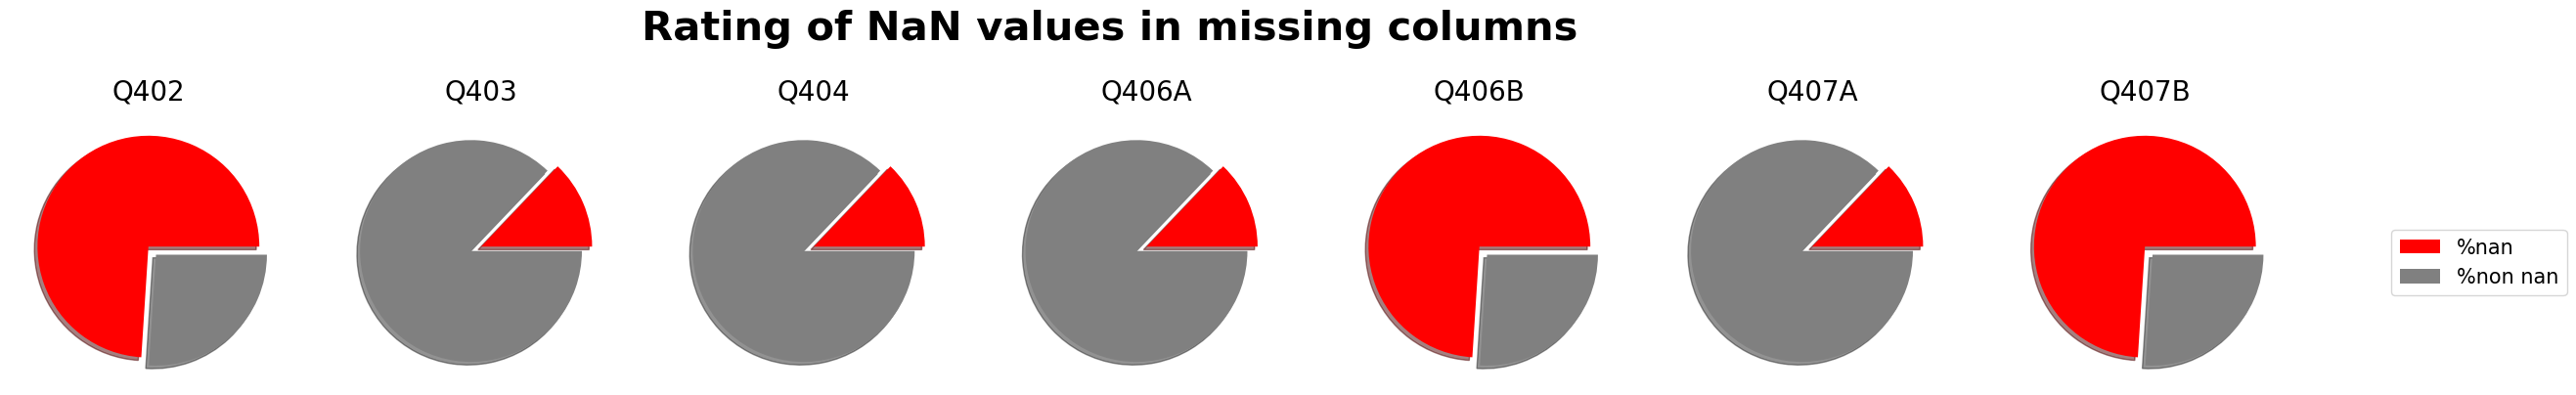

In [41]:
fig, ax = plt.subplots(1, len(cols_has_nan.columns), figsize = (30, 5))

explode = [0,0.1]
labels = ['%nan', '%non nan']

for ind, col in enumerate(cols_has_nan.columns): 
    ax[ind].pie(cols_has_nan[col][0], colors = ["red", "grey"], explode = explode, shadow = True)
    ax[ind].set_title(f"{col}", fontsize = 20)

fig.suptitle("Rating of NaN values in missing columns", fontsize = 30, fontweight = "bold")
fig.legend(labels = labels,  bbox_to_anchor = (1,0.55), fontsize = 15)
plt.show()

- Có nhiều cột lượng thông tin không đủ để phân tích. Ta tiến hành loại bỏ các cột có số thông tin bị thiếu trên 50%.
- Các cột khác có số lượng dữ liệu thiếu như nhau. Có thể tiến hành như với dữ liệu trên để loại bỏ dữ liệu thiếu.

In [42]:
High_nan = num_nan_in_columns[num_nan_in_columns/len(diary_main_df) >= 0.5].to_frame().T
diary_main_df.drop(High_nan.columns, axis = 1, inplace=True)

In [43]:
diary_main_df.drop(['pid'], axis= 1, inplace= True)
diary_main_df.describe()

,ID,MATINH,Urban_Rural,age,gender,job_group,SEQ,BEGIN,END,Duration,...,Q403,Q404,int1,int2,int3,int4,int5,int6,Q406A,Q407A
count,1.189330e+05,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,...,103613.000000,103613.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,103613.000000,103613.000000
mean,5.029142e+14,49.785964,1.625823,40.110802,1.688505,2.957321,11.187231,777.376254,850.034305,72.658051,...,2.247604,1.321494,0.087528,0.021298,0.067458,0.084115,0.006987,0.085502,0.124936,1.070512
std,2.833776e+14,28.074580,0.483912,13.276015,0.463106,1.656020,7.035456,338.004077,368.111278,95.340095,...,2.022178,0.467052,0.282609,0.144376,0.250815,0.277561,0.083297,0.279628,0.330648,1.569925
min,1.001000e+13,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,240.000000,250.000000,10.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.130411e+14,31.000000,1.000000,31.000000,1.000000,1.000000,5.000000,450.000000,520.000000,20.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445419e+14,44.000000,2.000000,39.000000,2.000000,2.000000,10.000000,750.000000,810.000000,30.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.574226e+14,75.000000,2.000000,51.000000,2.000000,5.000000,16.000000,1080.000000,1110.000000,80.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,9.596132e+14,95.000000,2.000000,64.000000,2.000000,5.000000,47.000000,1670.000000,1680.000000,860.000000,...,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Có 4 thuộc tính có số dữ liệu thiếu giống nhau. Ta xét trường hợp này.

In [44]:
Nan_row = diary_main_df.isna().sum(axis=1)
Drop_row = Nan_row[Nan_row >= 4].index
print(f"Có {len(Drop_row)} dòng bị thiếu nhiều hơn 4 thuộc tính.")

Có 15320 dòng bị thiếu nhiều hơn 4 thuộc tính.


In [45]:
diary_main_df.drop(Drop_row, inplace=True)
diary_main_df.describe()

,ID,MATINH,Urban_Rural,age,gender,job_group,SEQ,BEGIN,END,Duration,...,Q403,Q404,int1,int2,int3,int4,int5,int6,Q406A,Q407A
count,1.036130e+05,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,...,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000
mean,5.028968e+14,49.784419,1.626601,40.156689,1.692635,2.956627,11.186907,774.154401,826.210997,52.056595,...,2.247604,1.321494,0.100470,0.024437,0.077432,0.096552,0.008020,0.098144,0.124936,1.070512
std,2.837329e+14,28.109443,0.483709,13.274357,0.461404,1.655645,6.690100,315.350857,319.652201,62.506492,...,2.022178,0.467052,0.300627,0.154403,0.267278,0.295348,0.089196,0.297511,0.330648,1.569925
min,1.001000e+13,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,240.000000,250.000000,10.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.130411e+14,31.000000,1.000000,31.000000,1.000000,1.000000,6.000000,460.000000,540.000000,20.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445419e+14,44.000000,2.000000,39.000000,2.000000,2.000000,10.000000,750.000000,800.000000,30.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.774727e+14,77.000000,2.000000,51.000000,2.000000,5.000000,16.000000,1060.000000,1100.000000,60.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,9.596132e+14,95.000000,2.000000,64.000000,2.000000,5.000000,46.000000,1670.000000,1680.000000,860.000000,...,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [46]:
data = {
    'index': [1,2,3,4,5,6,7,8],
    'value': [
        'Your family or home',
        'Other family or home',
        'Work place',
        'Shop/Services place',
        'School/place of study',
        'Transport/on vehicle',
        'Public area',
        'Other',
    ]
}
placedf = pd.DataFrame(data)
placedf

,index,value
0,1,Your family or home
1,2,Other family or home
2,3,Work place
3,4,Shop/Services place
4,5,School/place of study
5,6,Transport/on vehicle
6,7,Public area
7,8,Other


In [47]:
data = {
    'index': [1,2,3],
    'value': [
        'Alone',
        'In company',
        'Together'
    ]
}
Q404df = pd.DataFrame(data)
Q404df

,index,value
0,1,Alone
1,2,In company
2,3,Together


In [48]:
data = {
    'index': [0,1],
    'value': [
        'No',
        'Yes',
    ]
}
Q406Adf = pd.DataFrame(data)
Q406Adf

,index,value
0,0,No
1,1,Yes


In [49]:
data = {
    'index': [0,1,2,3,4,5,6,7],
    'value': [
        'For myself',
        'Member(s) of my household',
        'Myself and members of my household	',
        'Members of my family (not belonging to my household)',
        'Non family members of other household',
        'Job/ Work',
        'Community / education / culture / religion',
        'Other',
    ]
}
Q407Adf = pd.DataFrame(data)
Q407Adf

,index,value
0,0,For myself
1,1,Member(s) of my household
2,2,Myself and members of my household\t
3,3,Members of my family (not belonging to my hous...
4,4,Non family members of other household
5,5,Job/ Work
6,6,Community / education / culture / religion
7,7,Other


In [50]:
diary_main_df['MATINH'] = diary_main_df['MATINH'].map(MaTinhdf.set_index('MATINH')['TenMaTinh'])
diary_main_df['gender'] = diary_main_df['gender'].map(genderdf.set_index('index')['value'])
diary_main_df['Urban_Rural'] = diary_main_df['Urban_Rural'].map(Urbanitydf.set_index('index')['value'])
diary_main_df['Q403'] = diary_main_df['Q403'].map(placedf.set_index('index')['value'])
diary_main_df['Q404'] = diary_main_df['Q404'].map(Q404df.set_index('index')['value'])
diary_main_df['Q406A'] = diary_main_df['Q406A'].map(Q406Adf.set_index('index')['value'])
diary_main_df['Q407A'] = diary_main_df['Q406A'].map(Q406Adf.set_index('index')['value'])
diary_main_df['int1'] = diary_main_df['int1'].map(YesNodf.set_index('index')['value'])
diary_main_df['int2'] = diary_main_df['int2'].map(YesNodf.set_index('index')['value'])
diary_main_df['int3'] = diary_main_df['int3'].map(YesNodf.set_index('index')['value'])
diary_main_df['int4'] = diary_main_df['int4'].map(YesNodf.set_index('index')['value'])
diary_main_df['int5'] = diary_main_df['int5'].map(YesNodf.set_index('index')['value'])
diary_main_df['int6'] = diary_main_df['int6'].map(YesNodf.set_index('index')['value'])

In [51]:
diary_main_df.rename(columns= {
    'MATINH': 'Tên Mã Tỉnh',
    'Q401': 'Main actitvity', 
    'Q403': 'Place', 
    'Q404': 'Alone, company, together', 
    'Q406A': 'Earn money with main act', 
    'Q407A' : 'Working for whom',
    'int1': 'With wife/husband', 
    'int2': 'With parents', 
    'int3': 'With HH under 6 y.o', 
    'int4': 'With HH from 6 to 60 y.o',
    'int5': 'With HH Above 60 y.o', 
    'int6' : 'With other'
}, inplace= True)
diary_main_df.head()

,ID,Tên Mã Tỉnh,Urban_Rural,age,gender,job_group,SEQ,BEGIN,END,Duration,...,Place,"Alone, company, together",With wife/husband,With parents,With HH under 6 y.o,With HH from 6 to 60 y.o,With HH Above 60 y.o,With other,Earn money with main act,Working for whom
0,10010000600801,Thành phố Hà Nội,Urban,28,female,1,18,1350,1370,20,...,Your family or home,Alone,No,No,No,No,No,No,No,NaN
1,10010000600801,Thành phố Hà Nội,Urban,28,female,1,8,750,900,150,...,Work place,In company,No,No,No,No,No,Yes,Yes,NaN
2,10010000600801,Thành phố Hà Nội,Urban,28,female,1,4,340,360,20,...,Transport/on vehicle,Alone,No,No,No,No,No,No,No,NaN
3,10010000600801,Thành phố Hà Nội,Urban,28,female,1,7,710,750,40,...,Work place,In company,No,No,No,No,No,Yes,No,NaN
5,10010000600801,Thành phố Hà Nội,Urban,28,female,1,17,1260,1350,90,...,Your family or home,Alone,No,No,No,No,No,No,No,NaN


In [52]:
diary_main_df.to_excel('./Processed/Diary_processed.xlsx')